In [2]:
import numpy as np

# 2 LSQ

In [34]:
t = np.array([-2,-1,0,1,2])
y = np.array([0,15,25,50,110])

In [9]:
def f1(t):
    return np.ones_like(t)

def f2(t):
    return t

def f3(t):
    return t**2 -2

In [ ]:
# Construct A
A = np.column_stack((f1(t), f2(t), f3(t)))

In [41]:
# Normal equation: A^TAx = A^Ty
print(f'The normal equation is: \n{A.T@A}x = {A.T @ y} \n')

x_b = np.linalg.solve(A.T @ A, A.T @ y)
print('Using backslash (using scipy.linalg.solve in Python):')
print(x_b)


The normal equation is: 
[[ 5.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 14.]]x = [200. 255. 105.] 

Using backslash (using scipy.linalg.solve in Python):
[40.  25.5  7.5]


In [43]:
def linearLSQ(A,y):
    Q, R = np.linalg.qr(A)
    # x_solution = np.linalg.solve(R, Q.T @ y)
    return np.linalg.inv(R) @ Q.T @ y

x_qr = linearLSQ(A,y)
print('Using QR factorization:')
print(x_qr)

Using QR factorization:
[40.  25.5  7.5]


In [44]:
# Compute the tau value:
r = A @ x_qr - y
tau = np.linalg.norm(r, 2) / np.sqrt(A.shape[0] - A.shape[1])
print(tau)

8.944271909999161


# 3 Trigonometrical fit

In [45]:
x = np.array([11,25,26,31,33,35,47,58,75,79])
y = np.array([160,140,138,130,125,120,95,72,27,17])

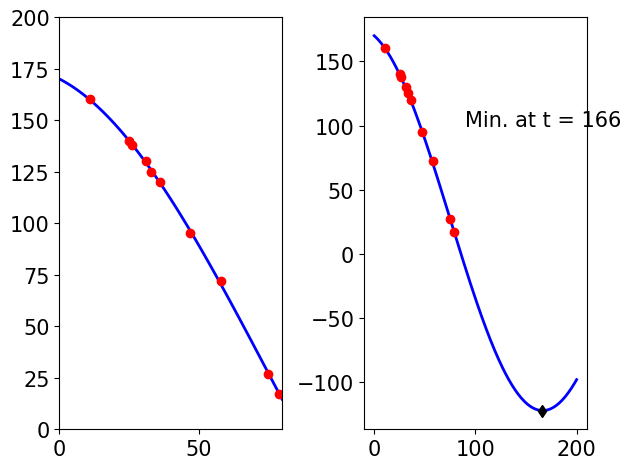

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def linearLSQ(A, y):
    Q, R = np.linalg.qr(A)
    return np.linalg.solve(R, Q.T @ y)

# Data
x = np.array([11, 25, 26, 31, 33, 36, 47, 58, 75, 79]).reshape(-1, 1)
y = np.array([160, 140, 138, 130, 125, 120, 95, 72, 27, 17]).reshape(-1, 1)
m = len(x)

omega = 2 * np.pi / 365
F = np.hstack([np.ones((m, 1)), np.sin(omega * x), np.cos(omega * x)])

c = linearLSQ(F, y)

# First plot
xx = np.arange(0, 81).reshape(-1, 1)
FF = np.hstack([np.ones(xx.shape), np.sin(omega * xx), np.cos(omega * xx)])
yy = FF @ c

plt.subplot(1, 2, 1)
plt.plot(xx, yy, '-b', x, y, 'or', linewidth=2)
plt.gca().tick_params(labelsize=15)
plt.axis([0, 80, 0, 200])

# Second plot
xx = np.arange(0, 201).reshape(-1, 1)
FF = np.hstack([np.ones(xx.shape), np.sin(omega * xx), np.cos(omega * xx)])
yy = FF @ c

minyy_index = np.argmin(yy)
minyy_value = yy[minyy_index]

plt.subplot(1, 2, 2)
plt.plot(xx, yy, '-b', x, y, 'or', linewidth=2)
plt.plot(xx[minyy_index], minyy_value, 'kd', linewidth=2)
plt.gca().tick_params(labelsize=15)
plt.text(90, 100, f'Min. at t = {xx[minyy_index][0]}', fontsize=15)

plt.tight_layout()
plt.show()
